In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/twitter_dataset.csv")

# Calculate engagement rate
df['Engagement_Rate'] = (df['Retweets'] + df['Likes']) / df.shape[0]

# Calculate total retweets and likes
total_retweets = df['Retweets'].sum()
total_likes = df['Likes'].sum()

# Calculate average retweets and likes per user
avg_retweets_per_user = df.groupby('Username')['Retweets'].mean().mean()
avg_likes_per_user = df.groupby('Username')['Likes'].mean().mean()

# Display results
print("Total Retweets:", total_retweets)
print("Total Likes:", total_likes)
print("Average Retweets per User:", avg_retweets_per_user)
print("Average Likes per User:", avg_likes_per_user)


Total Retweets: 497212
Total Likes: 499293
Average Retweets per User: 49.69322889100596
Average Likes per User: 49.946183973748276


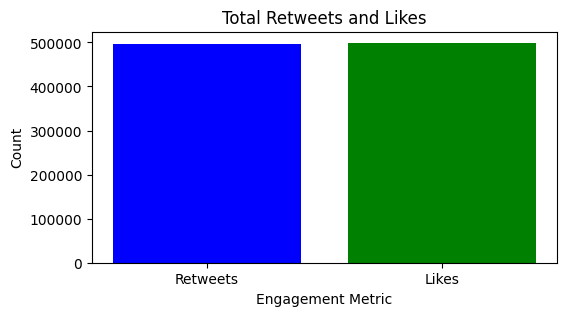

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for total retweets and likes
plt.figure(figsize=(6, 3))
plt.bar(['Retweets', 'Likes'], [total_retweets, total_likes], color=['blue', 'green'])
plt.title('Total Retweets and Likes')
plt.xlabel('Engagement Metric')
plt.ylabel('Count')
plt.show()


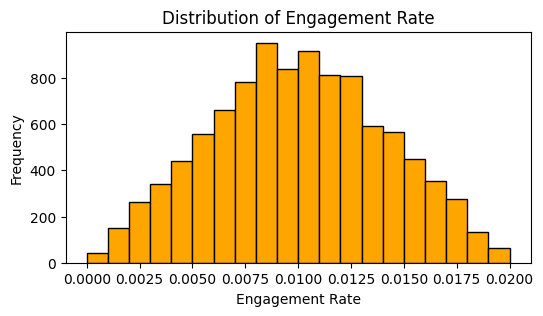

In [ ]:
# Create a histogram for the distribution of engagement rate
plt.figure(figsize=(6, 3))
plt.hist(df['Engagement_Rate'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()


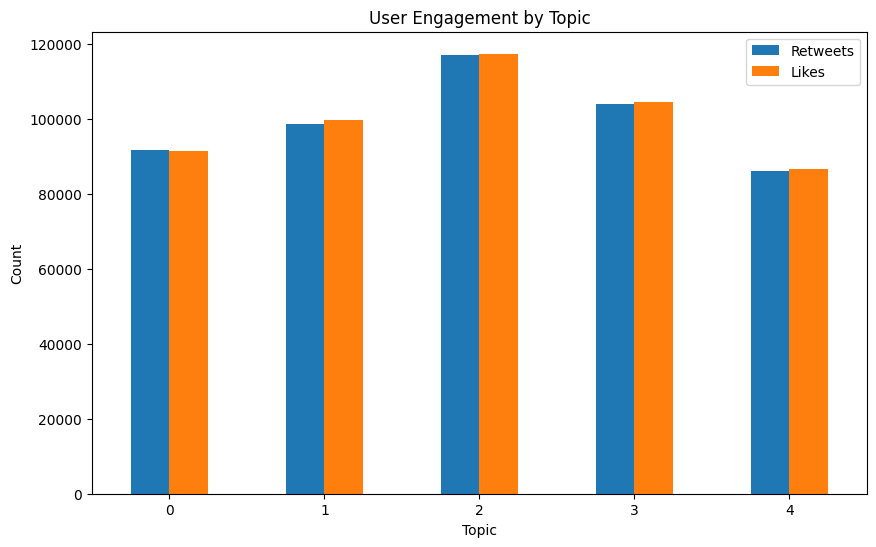

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/twitter_dataset.csv")

# Preprocess the text data (you can reuse the preprocess_text function from the previous examples)

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Text'])

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Assign topics to each tweet
topic_assignments = lda_model.transform(tfidf_matrix)
df['Topic'] = topic_assignments.argmax(axis=1)

# Aggregate user engagement by topic
engagement_by_topic = df.groupby('Topic')[['Retweets', 'Likes']].sum()

# Visualize user engagement by topic
engagement_by_topic.plot(kind='bar', figsize=(10, 6))
plt.title('User Engagement by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Retweets', 'Likes'])
plt.show()


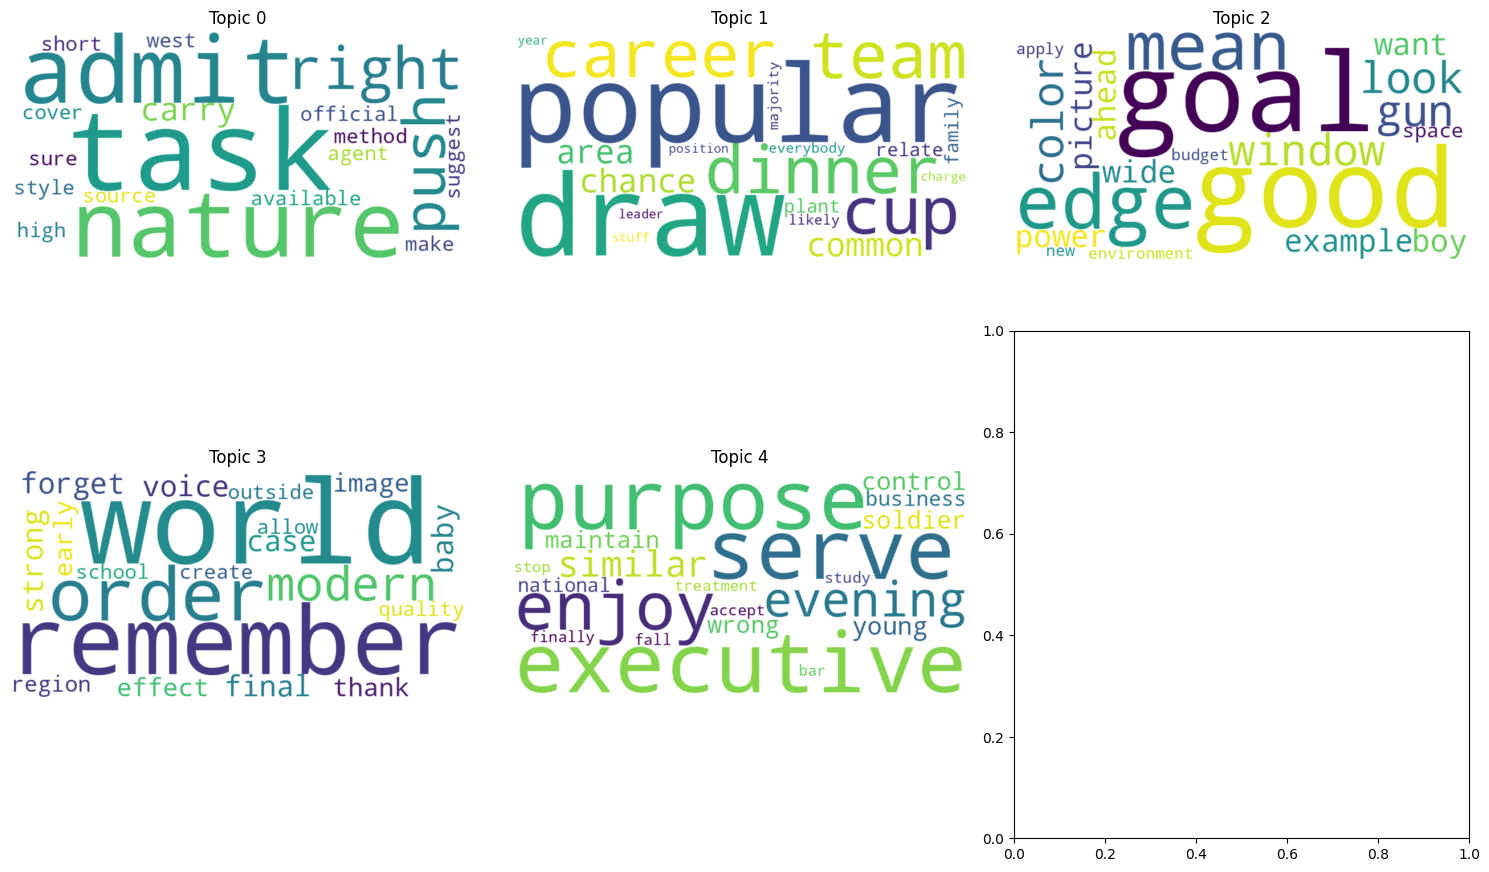

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word clouds for each topic
def generate_wordclouds(lda_model, vectorizer, num_topics, num_words=20):
    wordclouds = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        # Get the top words for the topic
        top_word_indices = topic.argsort()[:-num_words-1:-1]
        feature_names = vectorizer.get_feature_names_out()
        top_words = [feature_names[i] for i in top_word_indices]
        # Create a word cloud for the topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))
        wordclouds[f'Topic {topic_idx}'] = wordcloud
    return wordclouds

# Generate word clouds for each topic
wordclouds = generate_wordclouds(lda_model, vectorizer, num_topics)

# Plot the word clouds
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (topic, wordcloud) in enumerate(wordclouds.items()):
    ax = axes[i//3, i%3]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(topic)
    ax.axis('off')
plt.tight_layout()
plt.show()
